In [1]:
import os
import math
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv("hd_gm.csv")
df = df.drop(columns='rgn_nm')

In [10]:
store_data = df.rename(columns={'date_snap': 'ds', 'ty_net_shrink':'y'})

In [16]:

pd.set_option("display.max_rows", 10, "display.max_columns", None)
store_data.dtypes
store_data

,STR_ALIAS,y,ty_inv_sls,inv_cnt,cycle_length,FET_FLG,LU_FLG,urban,suburban,rural,ds,fyfw_prd_bgn,fyfw_prd_end,str_fet_wk_cnt,net_sls_amt,net_sls_amt.1,rtn_amt_rt,rtn_trans_rt,mkup_rt,rsn_01_rt,rsn_02_rt,dc_dmg_rt,str_dmg_rt,cust_sat_rt,rsn_06_rt,str_use_rt,rsn_09_rt,rdtag_rt,rsn_12_rt,rsn_15_rt,rsn_18_rt,rsn_22_rt,rsn_23_rt,rsn_24_rt,rsn_25_rt,promo_rt,rsn_30_rt,rsn_33_rt,rsn_40_rt,rsn_41_rt,rsn_48_rt,rsn_49_rt,pc_rsn_24_rt,pc_rsn_25_rt,pc_rsn_27_rt,cull_mkdn_rt,rtv_crt_retl,rtv_del_retl,avg_inv_turns,yr_inv_turns,clear_inv_pct,ops_net_oh_unt_qty,ops_net_oh_retl_amt,theft_net_oh_unt_qty,theft_net_oh_retl_amt,net_oh_unt_qty,net_oh_retl_amt,net_adj_freq,neg_oh_unt_qty,neg_oh_retl_amt,neg_adj_freq,port_pwr_net_oh_unt_qty,port_pwr_net_oh_retl_amt,port_pwr_net_adj_freq,emp_pkg_retl_amt,emp_pkg_unt_qty,boss_ord_cnt,boss_can_cnt,boss_rtn_cnt,boss_can_pct,boss_rtn_pct,bopis_ord_cnt,bopis_can_cnt,bopis_rtn_cnt,bopis_can_pct,bopis_rtn_pct,bodfs_ord_cnt,bodfs_can_cnt,bodfs_rtn_cnt,bodfs_can_pct,bodfs_rtn_pct,nrr_unt_qty,nrr_retl_amt,auto_kr_cnt,exp_buy_back,net_inv_cnt_adj_unt_qty,net_inv_cnt_adj_retl_amt,boris_rtn_retl_amt,boris_rtn_unt_qty,boris_rtn_retl_pct,aft_audio_inval_scan_retl_amt,aft_intrvntn_inval_scan_retl_amt,aft_audio_inval_scan_unt_cnt,aft_intrvntn_inval_scan_unt_cnt,tot_inval_scan_retl_amt,tot_inval_scan_unt_cnt,tot_inval_scan_retl_pct,inval_sls_intrvntn_rt,inval_unt_intrvntn_rt,cash_pen,sco_pen,key_sku_rt,qty_key_rt,gen_sku_rt,d90_cash_vs_total,d90_sco_vs_total,d90_cash_vs_main,d90_sco_vs_main,attr_rt,quick_term_rt,avg_tenure,avg_wage,pt_ratio,int_cnt,int_val,ext_cnt,ext_val,known_theft_cnt,known_theft_val,merch_recov_cnt,merch_recov_val,pos_recov_cnt,pos_recov_val,risk_avt_cnt,risk_avt_val,lowes_flag,lowes_cnt,menards_flag,menards_cnt,avg_osha_rt,aci_score,cap_index,online_sat_voc_num,online_sat_voc_den,online_sat_voc_pct,zip_code,shsrink_rate
0,1001,611648.84,32660070.09,3,55,0,1,0,1,0,10/2/17,201635,201735,0,556736.78,22038030.28,-0.149609,0.101869,0.009331,0.000324,0.000773,0.000211,0.007403,0.004279,0.000131,0.000503,0.009140,0.001536,0.001531,0.001433,0.000005,0.000058,0.001622,0.000765,0.001998,0.007829,0.003467,-0.000272,0.002294,0.003203,0.000092,0.005849,0.008508,0.009148,0.013137,0.004277,719.41,643.82,0.087944,0.085736,0.019436,-17919.40,-187109.98,-4115.00,-69641.24,-22034.40,-256751.22,14311,-87379.14,-774446.10,7838,-226.0,-26042.57,199,47911.99,4503.1,1185,73,177,0.061603,0.149367,3165,521,265,0.164613,0.083728,173,15,10,0.086705,0.057803,64914.05,554239.33,0,0,-62610.1,-69130.6,-88596.69,-3624.0,-0.004020,322155.1211,150330.5153,19538.69121,6535.484848,472485.6364,26074.17606,0.021440,0.318169,0.250650,0.282240,0.110415,0.059294,0.034961,0.000064,0.418338,0.155321,0.729245,0.270755,0.010618,0.208333,5.412885,12.605000,0.633269,2,1844.75,7,7407.0,3,1800.00,18,12339.19,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,164.08,193,0.850155,30096,0.018728
1,1001,611648.84,32660070.09,3,55,0,1,0,1,0,10/9/17,201636,201736,0,557228.39,22559095.42,-0.150751,0.101917,0.009346,0.000317,0.000774,0.000221,0.007390,0.004273,0.000128,0.000549,0.009109,0.001554,0.001549,0.001440,0.000005,0.000057,0.001656,0.000755,0.002017,0.007692,0.003403,-0.000282,0.002316,0.003197,0.000090,0.005829,0.008535,0.009397,0.012944,0.004386,719.41,643.82,0.088103,0.085589,0.019301,-18313.57,-185477.61,-4101.00,-72494.31,-22414.57,-257971.92,14779,-90531.31,-799863.60,8037,-241.0,-28337.57,204,48501.01,4569.1,1231,80,193,0.064988,0.156783,3229,527,270,0.163208,0.083617,182,24,11,0.131868,0.060440,67023.71,569946.93,0,0,-62610.1,-69130.6,-92099.49,-3844.0,-0.004083,322155.1211,150330.5153,19538.69121,6535.484848,472485.6364,26074.17606,0.020944,0.318169,0.250650,0.282114,0.110415,0.059323,0.034963,0.000069,0.418329,0.155359,0.729192,0.270808,0.010769,0.205479,5.411538,12.604808,0.633269,2,1844.75,7,7407.0,3,1800.00,18,12339.19,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,164.23,193,0.850933,30096,0.018728
2,1001,611648.84,32660070.09,3,55,0,1,0,1,0,10/16/17,2016

In [ ]:
pd.to_datetime(store_data.ds)

0       2017-10-02
1       2017-10-09
2       2017-10-16
3       2017-10-23
4       2017-10-30
           ...    
97204   2019-06-24
97205   2019-07-01
97206   2019-07-08
97207   2019-07-15
97208   2019-07-22
Name: ds, Length: 97209, dtype: datetime64[ns]

In [20]:
stores = store_data['STR_ALIAS'].unique()
stores.shape

(700,)

In [ ]:
store_data.head()

,STR_ALIAS,y,ty_inv_sls,inv_cnt,cycle_length,FET_FLG,LU_FLG,urban,suburban,rural,...,menards_flag,menards_cnt,avg_osha_rt,aci_score,cap_index,online_sat_voc_num,online_sat_voc_den,online_sat_voc_pct,zip_code,shrink_rate
0,1001,611648.84,32660070.09,3,55,0,1,0,1,0,...,0,0,0.815405,0,0,164.08,193,0.850155,30096,0.018728
1,1001,611648.84,32660070.09,3,55,0,1,0,1,0,...,0,0,0.815405,0,0,164.23,193,0.850933,30096,0.018728
2,1001,611648.84,32660070.09,3,55,0,1,0,1,0,...,0,0,0.815405,0,0,163.67,193,0.848031,30096,0.018728
3,1001,611648.84,32660070.09,3,55,0,1,0,1,0,...,0,0,0.815405,0,0,162.96,191,0.853194,30096,0.018728
4,1001,611648.84,32660070.09,3,55,0,1,0,1,0,...,0,0,0.815405,0,0,161.74,189,0.855767,30096,0.018728


In [22]:
features = []
for c in store_data.columns:
    features.append(c)

In [23]:
features

['STR_ALIAS',
 'y',
 'ty_inv_sls',
 'inv_cnt',
 'cycle_length',
 'FET_FLG',
 'LU_FLG',
 'urban',
 'suburban',
 'rural',
 'ds',
 'fyfw_prd_bgn',
 'fyfw_prd_end',
 'str_fet_wk_cnt',
 'net_sls_amt',
 'net_sls_amt.1',
 'rtn_amt_rt',
 'rtn_trans_rt',
 'mkup_rt',
 'rsn_01_rt',
 'rsn_02_rt',
 'dc_dmg_rt',
 'str_dmg_rt',
 'cust_sat_rt',
 'rsn_06_rt',
 'str_use_rt',
 'rsn_09_rt',
 'rdtag_rt',
 'rsn_12_rt',
 'rsn_15_rt',
 'rsn_18_rt',
 'rsn_22_rt',
 'rsn_23_rt',
 'rsn_24_rt',
 'rsn_25_rt',
 'promo_rt',
 'rsn_30_rt',
 'rsn_33_rt',
 'rsn_40_rt',
 'rsn_41_rt',
 'rsn_48_rt',
 'rsn_49_rt',
 'pc_rsn_24_rt',
 'pc_rsn_25_rt',
 'pc_rsn_27_rt',
 'cull_mkdn_rt',
 'rtv_crt_retl',
 'rtv_del_retl',
 'avg_inv_turns',
 'yr_inv_turns',
 'clear_inv_pct',
 'ops_net_oh_unt_qty',
 'ops_net_oh_retl_amt',
 'theft_net_oh_unt_qty',
 'theft_net_oh_retl_amt',
 'net_oh_unt_qty',
 'net_oh_retl_amt',
 'net_adj_freq',
 'neg_oh_unt_qty',
 'neg_oh_retl_amt',
 'neg_adj_freq',
 'port_pwr_net_oh_unt_qty',
 'port_pwr_net_oh_retl_am

In [30]:
grouped = store_data.groupby("STR_ALIAS")
grouped.get_group(1001)

,STR_ALIAS,y,ty_inv_sls,inv_cnt,cycle_length,FET_FLG,LU_FLG,urban,suburban,rural,ds,fyfw_prd_bgn,fyfw_prd_end,str_fet_wk_cnt,net_sls_amt,net_sls_amt.1,rtn_amt_rt,rtn_trans_rt,mkup_rt,rsn_01_rt,rsn_02_rt,dc_dmg_rt,str_dmg_rt,cust_sat_rt,rsn_06_rt,str_use_rt,rsn_09_rt,rdtag_rt,rsn_12_rt,rsn_15_rt,rsn_18_rt,rsn_22_rt,rsn_23_rt,rsn_24_rt,rsn_25_rt,promo_rt,rsn_30_rt,rsn_33_rt,rsn_40_rt,rsn_41_rt,rsn_48_rt,rsn_49_rt,pc_rsn_24_rt,pc_rsn_25_rt,pc_rsn_27_rt,cull_mkdn_rt,rtv_crt_retl,rtv_del_retl,avg_inv_turns,yr_inv_turns,clear_inv_pct,ops_net_oh_unt_qty,ops_net_oh_retl_amt,theft_net_oh_unt_qty,theft_net_oh_retl_amt,net_oh_unt_qty,net_oh_retl_amt,net_adj_freq,neg_oh_unt_qty,neg_oh_retl_amt,neg_adj_freq,port_pwr_net_oh_unt_qty,port_pwr_net_oh_retl_amt,port_pwr_net_adj_freq,emp_pkg_retl_amt,emp_pkg_unt_qty,boss_ord_cnt,boss_can_cnt,boss_rtn_cnt,boss_can_pct,boss_rtn_pct,bopis_ord_cnt,bopis_can_cnt,bopis_rtn_cnt,bopis_can_pct,bopis_rtn_pct,bodfs_ord_cnt,bodfs_can_cnt,bodfs_rtn_cnt,bodfs_can_pct,bodfs_rtn_pct,nrr_unt_qty,nrr_retl_amt,auto_kr_cnt,exp_buy_back,net_inv_cnt_adj_unt_qty,net_inv_cnt_adj_retl_amt,boris_rtn_retl_amt,boris_rtn_unt_qty,boris_rtn_retl_pct,aft_audio_inval_scan_retl_amt,aft_intrvntn_inval_scan_retl_amt,aft_audio_inval_scan_unt_cnt,aft_intrvntn_inval_scan_unt_cnt,tot_inval_scan_retl_amt,tot_inval_scan_unt_cnt,tot_inval_scan_retl_pct,inval_sls_intrvntn_rt,inval_unt_intrvntn_rt,cash_pen,sco_pen,key_sku_rt,qty_key_rt,gen_sku_rt,d90_cash_vs_total,d90_sco_vs_total,d90_cash_vs_main,d90_sco_vs_main,attr_rt,quick_term_rt,avg_tenure,avg_wage,pt_ratio,int_cnt,int_val,ext_cnt,ext_val,known_theft_cnt,known_theft_val,merch_recov_cnt,merch_recov_val,pos_recov_cnt,pos_recov_val,risk_avt_cnt,risk_avt_val,lowes_flag,lowes_cnt,menards_flag,menards_cnt,avg_osha_rt,aci_score,cap_index,online_sat_voc_num,online_sat_voc_den,online_sat_voc_pct,zip_code,shsrink_rate
0,1001,611648.84,32660070.09,3,55,0,1,0,1,0,10/2/17,201635,201735,0,556736.78,22038030.28,-0.149609,0.101869,0.009331,0.000324,0.000773,0.000211,0.007403,0.004279,0.000131,0.000503,0.009140,0.001536,0.001531,0.001433,0.000005,0.000058,0.001622,0.000765,0.001998,0.007829,0.003467,-0.000272,0.002294,0.003203,0.000092,0.005849,0.008508,0.009148,0.013137,0.004277,719.41,643.82,0.087944,0.085736,0.019436,-17919.40,-187109.98,-4115.0,-69641.24,-22034.40,-256751.22,14311,-87379.14,-774446.10,7838,-226.0,-26042.57,199,47911.99,4503.1,1185,73,177,0.061603,0.149367,3165,521,265,0.164613,0.083728,173,15,10,0.086705,0.057803,64914.05,554239.33,0,0,-62610.1,-69130.60,-88596.69,-3624.0,-0.004020,322155.1211,150330.5153,19538.69121,6535.484848,472485.6364,26074.17606,0.021440,0.318169,0.250650,0.282240,0.110415,0.059294,0.034961,0.000064,0.418338,0.155321,0.729245,0.270755,0.010618,0.208333,5.412885,12.605000,0.633269,2,1844.75,7,7407.0,3,1800.0,18,12339.19,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,164.08,193,0.850155,30096,0.018728
1,1001,611648.84,32660070.09,3,55,0,1,0,1,0,10/9/17,201636,201736,0,557228.39,22559095.42,-0.150751,0.101917,0.009346,0.000317,0.000774,0.000221,0.007390,0.004273,0.000128,0.000549,0.009109,0.001554,0.001549,0.001440,0.000005,0.000057,0.001656,0.000755,0.002017,0.007692,0.003403,-0.000282,0.002316,0.003197,0.000090,0.005829,0.008535,0.009397,0.012944,0.004386,719.41,643.82,0.088103,0.085589,0.019301,-18313.57,-185477.61,-4101.0,-72494.31,-22414.57,-257971.92,14779,-90531.31,-799863.60,8037,-241.0,-28337.57,204,48501.01,4569.1,1231,80,193,0.064988,0.156783,3229,527,270,0.163208,0.083617,182,24,11,0.131868,0.060440,67023.71,569946.93,0,0,-62610.1,-69130.60,-92099.49,-3844.0,-0.004083,322155.1211,150330.5153,19538.69121,6535.484848,472485.6364,26074.17606,0.020944,0.318169,0.250650,0.282114,0.110415,0.059323,0.034963,0.000069,0.418329,0.155359,0.729192,0.270808,0.010769,0.205479,5.411538,12.604808,0.633269,2,1844.75,7,7407.0,3,1800.0,18,12339.19,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,164.23,193,0.850933,30096,0.018728
2,1001,611648.84,32660070.09,3,55,0,1,0,1,0,10/16/17,201637

In [ ]:
# stores_train = store_data.loc[store_data["ds"]<"2021-01-01"]
# stores_test  = store_data.loc[store_data["ds"]>="2021-01-01"]

In [ ]:
# train = len(stores_train)
# test = len(stores_test)
# print(train)
# print(test)

39912
57297


In [ ]:
# stores_test['ds'][:10]

22     3/5/18
23    3/12/18
24    3/19/18
25    3/26/18
26     4/2/18
27     4/9/18
28    4/16/18
29    4/23/18
30    4/30/18
31     5/7/18
Name: ds, dtype: object

In [85]:
group = grouped.get_group(1001)

group['ds'] = pd.to_datetime(group['ds'])

train = group.loc[group["ds"]<"2020-01-01"]
test = group.loc[group["ds"]>="2020-01-01"]
train = train.drop('STR_ALIAS', 1)
print(train.shape)
print(test)


(117, 136)
     STR_ALIAS           y   ty_inv_sls  inv_cnt  cycle_length  FET_FLG  \
117       1001  1347095.52  35109052.01        3            48        0   
118       1001  1347095.52  35109052.01        3            48        0   
119       1001  1347095.52  35109052.01        3            48        0   
120       1001  1347095.52  35109052.01        3            48        0   
121       1001  1347095.52  35109052.01        3            48        0   
..         ...         ...          ...      ...           ...      ...   
150       1001  1347095.52  35109052.01        3            48        0   
151       1001  1347095.52  35109052.01        3            48        0   
152       1001  1347095.52  35109052.01        3            48        0   
153       1001  1347095.52  35109052.01        3            48        0   
154       1001  1347095.52  35109052.01        3            48        0   

     LU_FLG  urban  suburban  rural         ds  fyfw_prd_bgn  fyfw_prd_end  \
117       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(train)

In [86]:
train.isnull().sum()

y                     0
ty_inv_sls            0
inv_cnt               0
cycle_length          0
FET_FLG               0
                     ..
online_sat_voc_num    0
online_sat_voc_den    0
online_sat_voc_pct    0
zip_code              0
shsrink_rate          0
Length: 136, dtype: int64

In [53]:
new = train[['ds','y']]
new

,ds,y
0,2017-10-02,611648.84
1,2017-10-09,611648.84
2,2017-10-16,611648.84
3,2017-10-23,611648.84
4,2017-10-30,611648.84
...,...,...
112,2019-12-02,1347095.52
113,2019-12-09,1347095.52
114,2019-12-16,1347095.52
115,2019-12-23,1347095.52


In [2]:
features = []
targets = []
# print(train.columns)
for c in train.columns:
#     print(c)
    features.append(c)
#     if c==ds:
#         targets.append(c)
        
features.remove('y')
features.remove('ds')
#features.remove('STR_ALIAS')

NameError: ignored

In [90]:
features

['ty_inv_sls',
 'inv_cnt',
 'cycle_length',
 'FET_FLG',
 'LU_FLG',
 'urban',
 'suburban',
 'rural',
 'fyfw_prd_bgn',
 'fyfw_prd_end',
 'str_fet_wk_cnt',
 'net_sls_amt',
 'net_sls_amt.1',
 'rtn_amt_rt',
 'rtn_trans_rt',
 'mkup_rt',
 'rsn_01_rt',
 'rsn_02_rt',
 'dc_dmg_rt',
 'str_dmg_rt',
 'cust_sat_rt',
 'rsn_06_rt',
 'str_use_rt',
 'rsn_09_rt',
 'rdtag_rt',
 'rsn_12_rt',
 'rsn_15_rt',
 'rsn_18_rt',
 'rsn_22_rt',
 'rsn_23_rt',
 'rsn_24_rt',
 'rsn_25_rt',
 'promo_rt',
 'rsn_30_rt',
 'rsn_33_rt',
 'rsn_40_rt',
 'rsn_41_rt',
 'rsn_48_rt',
 'rsn_49_rt',
 'pc_rsn_24_rt',
 'pc_rsn_25_rt',
 'pc_rsn_27_rt',
 'cull_mkdn_rt',
 'rtv_crt_retl',
 'rtv_del_retl',
 'avg_inv_turns',
 'yr_inv_turns',
 'clear_inv_pct',
 'ops_net_oh_unt_qty',
 'ops_net_oh_retl_amt',
 'theft_net_oh_unt_qty',
 'theft_net_oh_retl_amt',
 'net_oh_unt_qty',
 'net_oh_retl_amt',
 'net_adj_freq',
 'neg_oh_unt_qty',
 'neg_oh_retl_amt',
 'neg_adj_freq',
 'port_pwr_net_oh_unt_qty',
 'port_pwr_net_oh_retl_amt',
 'port_pwr_net_adj_freq

In [ ]:

# m = Prophet()
# m.fit(group)
# future = m.make_future_dataframe(periods=365)
# forecast = m.predict(future)
# print(forecast.tail())


In [1]:
!pip install pystan==2.19.1.1
!pip install prophet
from prophet import Prophet

m = Prophet()

for f in features:
    print(f"saf {f} fuch" )
    m.add_regressor('%s' %f)

m.fit(train)

NameError: ignored

In [95]:
future = m.make_future_dataframe(periods=104, freq='1W')
future

,ds
0,2017-10-02
1,2017-10-09
2,2017-10-16
3,2017-10-23
4,2017-10-30
...,...
216,2021-11-28
217,2021-12-05
218,2021-12-12
219,2021-12-19


In [96]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ValueError: ignored

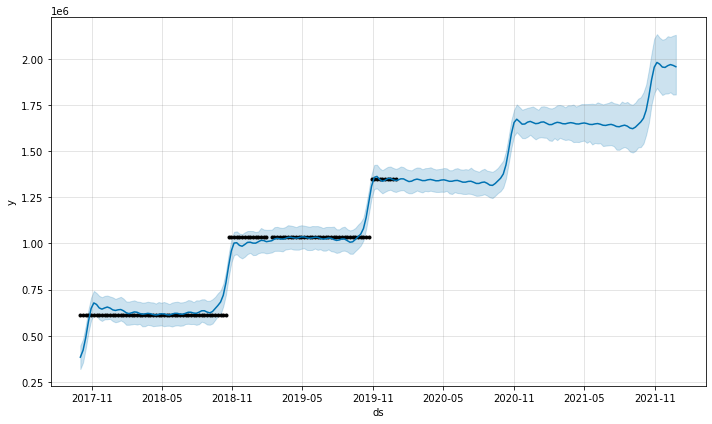

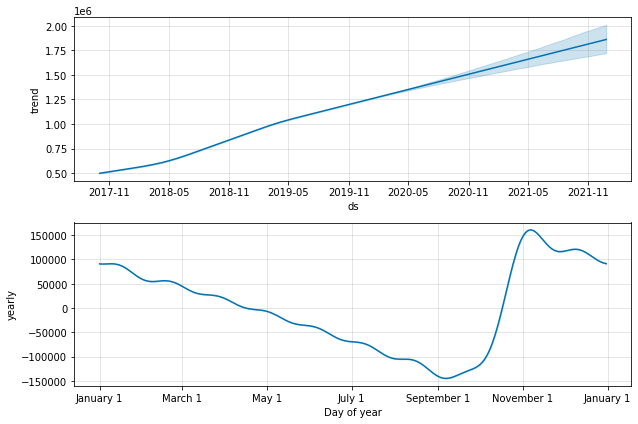

In [70]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
